## Required by Coursera
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

* Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

* Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

* A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

* Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## About the Dataset
This dataset is a public database that contains information on commercial patents applied in rancagua, Chile on 2017.It contains various columns such as the name, the legal representative, the domicile, the initial capital, among others.

For this work, the most important information is the company's line of business (GIRO column).

## Main objective
Since the company's line of business is a summary of the activities it performs, it is necessary to have the ability to analyze how the market is composed in the sector in a specific year.
For this, a clustering will be carried out with the line of business to be able to make it readable to the human.

To make it, a small EDA is carried out where the number of business lines can be seen and then to see if it is feasible or not to make a clustering on these groups.

In [2]:
# read the bd 
patents = pd.read_excel("patentes-comerciales-2-semestre-2017.xlsx")
patents.head(10)

,NOM-REPLEG,PATENTE,TIPO,TIPO PATENTE,CONGELADO,CODALCO,AGTP,FEC.VCTO,FEC.INI. ACT,CALLE,NUMERO,ACLARARORIA,NOMBRE,SII,NOMB-GIRO,ANEXOS,AFECTO CAPITAL,CAPITAL
0,.,100001,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,LOS ORFEBRES,364,.,ABRASIVOS CHILENOS LTDA. ...,38231,FABRIC.DE DISCO Y CORTE ...,.,50,185329425
1,KOLKA IGARTIGURU,100003,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,20030911,LOS TORNEROS,590,.,IGARTIBURU KOLKA E HIJO LTDA. ...,50036,FCA.INSTALACIONES METALICAS ...,.,100,5943962
2,.,100006,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,LOS ORFEBRES,407,.,CAVIERES S. MARCO A. ...,95131,TALLER MEC. DE PRECISION ...,.,100,0
3,.,100007,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,LOS CERAMISTAS,8571,.,ALUMINIO ALUMAX LTDA. ...,272020,FAB.DE ESTRUC.DE ALUMINIO ...,.,100,0
4,PATRICIA MOCARQUER SAMUR,100008,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,19991107,19961107,LA FORJA,8656,.,M A Q U I R LTDA. ...,61911,ENVAS.DE GASA Y APOSITOS ...,.,100,51415792
5,.,100011,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,20080627,LA FORJA,8761,.,HERSTELLER S.A. ...,35231,FCA.DETERGENTES INDUSTRIALES ...,.,100,-3469566
6,.,100012,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,19931122,LOS HERREROS,8708,.,DIFEM PHARMA S.A. ...,521900,FAB.PROD.QUIMICOS-FARMACEUT. ...,.,100,6431874138
7,.,100015,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,LA FORJA,8500,.,BENKEL HNOS.Y CIA.LTDA. ...,930990,FCA.TEJEDURIA CINTAS ...,.,100,778565959
8,.,100017,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,J. ALESSANDRI,210,.,FOODS CIA DE ALIMENTOS CCU S.A. ...,522050,FABRICA DE GALLETAS ...,.,36.37,-3228903229
9,.,100018,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,20081219,LOS HERREROS,8723,.,COMERCIAL CELTEX S.A. ...,39099,IND.PROD.TEX.SAN.Y S. ...,.,96.87,1161029893


### SMALL EDA

In [3]:
print(patents.info())
print(patents.shape)
patents.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NOM-REPLEG      5449 non-null   object
 1   PATENTE         5449 non-null   object
 2   TIPO            5449 non-null   object
 3   TIPO PATENTE    5449 non-null   object
 4   CONGELADO       5449 non-null   object
 5   CODALCO         5449 non-null   object
 6   AGTP            5449 non-null   object
 7   FEC.VCTO        5449 non-null   object
 8   FEC.INI. ACT    5449 non-null   object
 9   CALLE           5449 non-null   object
 10  NUMERO          5449 non-null   object
 11  ACLARARORIA     5443 non-null   object
 12  NOMBRE          5449 non-null   object
 13  SII             5449 non-null   object
 14  NOMB-GIRO       5449 non-null   object
 15  ANEXOS          5449 non-null   object
 16  AFECTO CAPITAL  5449 non-null   object
 17  CAPITAL         5449 non-null   object
dtypes: objec

,NOM-REPLEG,PATENTE,TIPO,TIPO PATENTE,CONGELADO,CODALCO,AGTP,FEC.VCTO,FEC.INI. ACT,CALLE,NUMERO,ACLARARORIA,NOMBRE,SII,NOMB-GIRO,ANEXOS,AFECTO CAPITAL,CAPITAL
count,5449,5449,5449,5449,5449,5449,5449,5449,5449,5449,5449,5443,5449,5449,5449,5449,5449,5449
unique,3610,5449,6,3,3,14,19,114,2616,706,2384,1317,5157,432,3004,1163,358,2831
top,.,100001,COMER,DEFINITIVA,.,.,AGTP 00 COMERCIAL,0,0,AVDA. LARRAIN,5862,.,FORUS S.A ...,742110,ARQUITECTO ...,.,100,0
freq,1488,1,2395,5310,5447,5256,1849,5254,376,507,304,3208,10,481,409,4066,4175,2162


In [4]:
# let's see the unique line of business 
len(patents["NOMB-GIRO"].unique())

3004

In [5]:
# we vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer
documents = patents["NOMB-GIRO"]
my_stop_words = ["de","en", "y"]

vectorizer = TfidfVectorizer(stop_words=my_stop_words)
X = vectorizer.fit_transform(documents)
# let's see X
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Machine learning section

In [6]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [7]:
# make a function to see the Elbow method 
def elbow_visualizator(init, max_iter, n_init, random_state):
    distortions = []
    K = range(1,10)
    for k in K:  
        kmeanModel = KMeans(n_clusters=k, init=init, max_iter=max_iter, n_init=n_init, random_state=random_state)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)
        
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

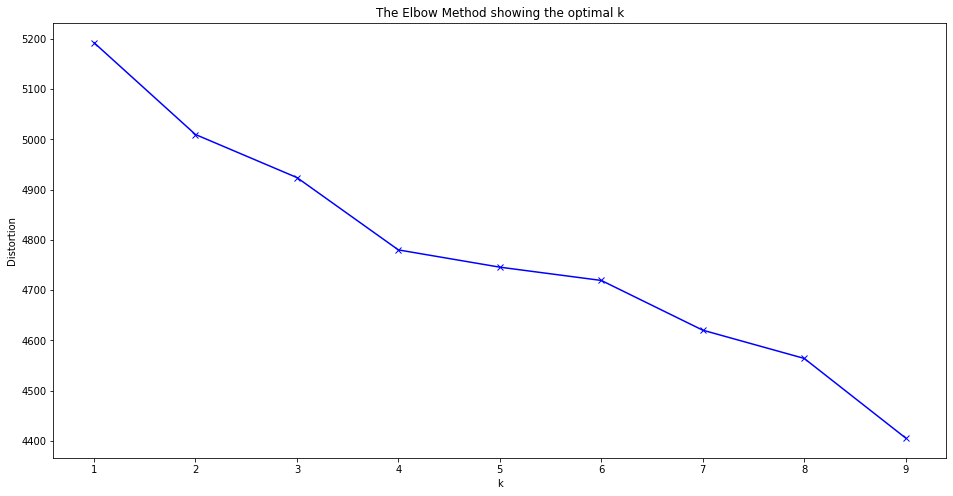

In [8]:
# see first configuration
elbow_visualizator(init='random', max_iter=200, n_init=5, random_state=20)

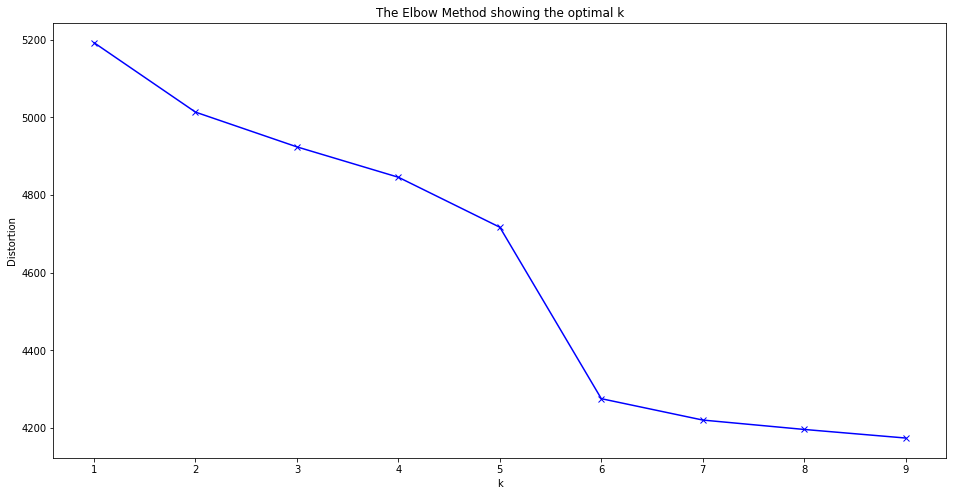

In [9]:
elbow_visualizator(init='k-means++', max_iter=100, n_init=1, random_state=10)

### Model selection

Given the elbow curve, the configuration that I like the most is the 2nd, since you can notice a better inflection curve than in the first configuration.

Now we are going to see the centroids of the clustering and see what groups of words it is giving us.

In [10]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=10)
model.fit(X)
predictions = model.predict(X)

In [11]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),


Top terms per cluster:
Cluster 0:
 ofp
 vta
 mef
 civil
 venta
 abarrotes
 ingeniero
 restaurant
 constructor
 almacen
Cluster 1:
 adm
 of
 capacitacion
 transporte
 inversion
 carga
 asesorias
 inmuebles
 vta
 sociedad
Cluster 2:
 inversiones
 sociedad
 ofp
 inversion
 soc
 of
 adm
 asesorias
 inmobiliaria
 rentista
Cluster 3:
 medicos
 servicios
 ofp
 ingenieria
 serv
 prestacion
 pres
 docentes
 opf
 prestac
Cluster 4:
 abogado
 yoga
 edif
 dvd
 ecologica
 ecologicos
 econ
 econom
 economica
 economicas
Cluster 5:
 arquitecto
 yoga
 dosimetria
 dulces
 dvd
 ecologica
 ecologicos
 econ
 econom
 economica


C:\Users\Vicente\Documents\COURSERA\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### PCA
For this section we are going to perform a pca with the categorical and discrete variables
Therefore, it will be necessary to carry out a feature engineering

In [12]:
# data cleaning and transformation
patents.tail(10)

# we notice that there is an empty row

,NOM-REPLEG,PATENTE,TIPO,TIPO PATENTE,CONGELADO,CODALCO,AGTP,FEC.VCTO,FEC.INI. ACT,CALLE,NUMERO,ACLARARORIA,NOMBRE,SII,NOMB-GIRO,ANEXOS,AFECTO CAPITAL,CAPITAL
5439,EDLIR CIMO,400336,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20160907,AVDA. LARRAIN,6738,.,GASTRONOMIA EDY LTDA. ...,552010,RESTAURANTE DIURNO O NOCTURNO ...,.,0,0
5440,JAIME IVAN GUERRERO DEVLAHOVIC,400337,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20160907,AV. ALC. FDO. CASTILLO VELASCO,8751,"LC/35 ,",PERU RESTAURANTS SPA ...,552010,RESTAURANT DIURNO O NOCTURNO ...,.,0,0
5441,PABLO SOLIS JIMENEZ,400338,ALCOH,DEFINITIVA,.,F00,AGTP 00 ALCOHOL,0,20160907,AVDA. P. DE GALES,6853,"LC/1A ,",INVERSIONES DER KONIG SPA ...,552020,EXPENDIO DE CERVEZAS ...,.,0,0
5442,PEDRO I. SCHAIN MALUK,400339,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20160930,AVDA. LARRAIN,5862,"LC/T-4008 ,",GEORGES S.A ...,552010,RESTAURANT DIURNO O NOCTURNO ...,.,0,0
5443,ANDREA DEL PILAR ABOID VERDUGO,400340,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20161201,AVDA. LARRAIN,6790,.,COMERCIAL GASTRONOMICA TAURUS S.A ...,552010,RESTAURANT DIURNO O NOCTURNO ...,.,0,0
5444,NELLY PAULINA MARABOLI CONTARD,400341,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20161201,C. SILVA VILDOSOLA,9073,"LC/7-A ,",MAZAI SUSHI RESTAURANT LTDA ...,552020,RESTAURANT DIURNO O NOCTURNO ...,.,0,0
5445,MIGUEL ANGEL SALAS GARAY,400343,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20170418,AVDA. LARRAIN,6367,.,ALIMENTOS C Y P LTDA ...,552010,RESTAURANT DIURNO O NOCTURNO ...,.,0,0
5446,MARIA F SENZACQUA KROMSCHRODER,400344,ALCOH,DEFINITIVA,.,F00,AGTP 00 ALCOHOL,0,20170420,AVDA. P. DE GALES,5921,"LC/B,",PANFIORE OPERATORE S.A ...,552020,EXPENDIO DE CERVEZA ...,.,0,0
5447,JUAN PABLO CHEUL STOLTZE,400345,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20170420,AVDA. LARRAIN,6741,"LC/ C ,",MRKEBAB SPA ...,552010,RESTAURANT DIURNO O NOCTURNO ...,.,0,0
5448,,,,,,,,,,,,,...,,...,...,,


In [13]:
# we are going to eliminate the columns of texts that do not belong to categories such as names and addresses
df = patents[:-1].copy()
columns_to_drop=["NOM-REPLEG","CALLE", "NUMERO","NOMBRE","ANEXOS","NOMB-GIRO","PATENTE"]
df.drop(columns=columns_to_drop, inplace=True)
df

,TIPO,TIPO PATENTE,CONGELADO,CODALCO,AGTP,FEC.VCTO,FEC.INI. ACT,ACLARARORIA,SII,AFECTO CAPITAL,CAPITAL
0,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,.,38231,50,185329425
1,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,20030911,.,50036,100,5943962
2,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,.,95131,100,0
3,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,0,0,.,272020,100,0
4,INDUS,DEFINITIVA,.,.,AGTP 00 INDUSTRIAL,19991107,19961107,.,61911,100,51415792
...,...,...,...,...,...,...,...,...,...,...,...
5443,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20161201,.,552010,0,0
5444,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20161201,"LC/7-A ,",552020,0,0
5445,ALCOH,DEFINITIVA,.,C02,AGTP 00 ALCOHOL,0,20170418,.,552010,0,0
5446,ALCOH,DEFINITIVA,.,F00,AGTP 00 ALCOHOL,0,20170420,"LC/B,",552020,0,0


In [14]:
# convert objects to float
def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return np.nan
    
df["CAPITAL"] = df["CAPITAL"].apply(lambda x: convert_float(x))
df["AFECTO CAPITAL"] = df["AFECTO CAPITAL"].apply(lambda x: convert_float(x))

In [15]:
# convert the objects to ordinal date
def convert_date(val):
    try:
        return pd.to_datetime(val, format='%Y%m%d').toordinal()
    except ValueError:
        return 0
    
df["FEC.VCTO"] = df["FEC.VCTO"].apply(lambda x: convert_date(x))
df["FEC.INI. ACT"] = df["FEC.INI. ACT"].apply(lambda x: convert_date(x))

0            0
1       731469
2            0
3            0
4       728970
         ...  
5443    736299
5444    736299
5445    736437
5446    736439
5447    736439
Name: FEC.INI. ACT, Length: 5448, dtype: int64

In [16]:
# make the other columns categorical
col_list = df.select_dtypes(include=['object']).columns.to_list()
col_list

['TIPO', 'TIPO PATENTE', 'CONGELADO', 'CODALCO', 'AGTP', 'ACLARARORIA', 'SII']

In [17]:
# label encoder for each
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in col_list:
    df[col] = df[col].astype("str")
    df[col] = le.fit_transform(df[col])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5448 entries, 0 to 5447
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TIPO            5448 non-null   int32  
 1   TIPO PATENTE    5448 non-null   int32  
 2   CONGELADO       5448 non-null   int32  
 3   CODALCO         5448 non-null   int32  
 4   AGTP            5448 non-null   int32  
 5   FEC.VCTO        5448 non-null   int64  
 6   FEC.INI. ACT    5448 non-null   int64  
 7   ACLARARORIA     5448 non-null   int32  
 8   SII             5448 non-null   int32  
 9   AFECTO CAPITAL  5448 non-null   float64
 10  CAPITAL         5448 non-null   float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 319.3 KB


array([[<AxesSubplot:title={'center':'TIPO'}>,
        <AxesSubplot:title={'center':'TIPO PATENTE'}>,
        <AxesSubplot:title={'center':'CONGELADO'}>],
       [<AxesSubplot:title={'center':'CODALCO'}>,
        <AxesSubplot:title={'center':'AGTP'}>,
        <AxesSubplot:title={'center':'FEC.VCTO'}>],
       [<AxesSubplot:title={'center':'FEC.INI. ACT'}>,
        <AxesSubplot:title={'center':'ACLARARORIA'}>,
        <AxesSubplot:title={'center':'SII'}>],
       [<AxesSubplot:title={'center':'AFECTO CAPITAL'}>,
        <AxesSubplot:title={'center':'CAPITAL'}>, <AxesSubplot:>]],
      dtype=object)

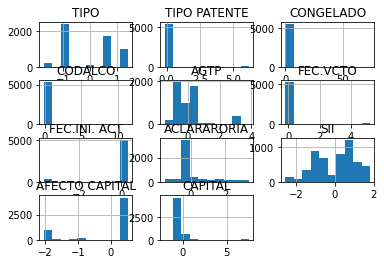

In [25]:
df.hist()

In [20]:
# stardar scarler
from sklearn.preprocessing import StandardScaler
columns = df.columns
scaler = StandardScaler()
for column in columns:
    df[[column]] = scaler.fit_transform(df[[column]])


In [21]:
# Now we make a pca choosing the number of components to see how it behaves
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

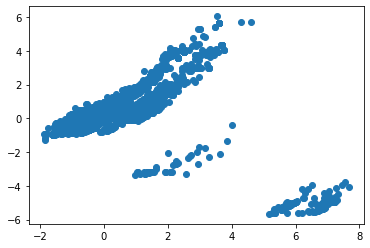

In [23]:
Xpca = pca.fit_transform(df)
plot = plt.scatter(Xpca[:,0], Xpca[:,1])

In [26]:
# Now let's see how much we have of explaining the variance with our 2 components
pca.explained_variance_ratio_

array([0.19486867, 0.16358447])

### Key finding and next steps

* As a key point we have that the clustering in the NOMB-GIRO variable gives a moderately satisfactory result since there are some groups of words that clearly have a relationship with a topic, but there is a lot of noise and words that do not add information, so a cleaning must be carried out. in the text more exhaustively to improve the result

* In addition, there are few configurations that were made to the main model, so more work can be done by performing a greater number of tests on the clustering algorithm itself.

* About the pca algorithm, we have that there is little explanation of the variance with only 2 features, however it is possible to appreciate how the algorithm works by recreating a linear relationship between the variables as a whole

###                                                                            Thank you !